In [1966]:
import numpy as np # linear algebra
import sklearn

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [1967]:
file_path = "Absolute_Genshin_DB.csv"
df = pd.read_csv(file_path)

In [1968]:
df.columns

Index(['charName', 'Gender', 'Element', 'Weapon', 'Region', 'f_val', 'm_val',
       'k_val', 'sum'],
      dtype='object')

In [1969]:
df.dtypes

charName    object
Gender      object
Element     object
Weapon      object
Region      object
f_val        int64
m_val        int64
k_val        int64
sum          int64
dtype: object

In [1970]:
df.head()

,charName,Gender,Element,Weapon,Region,f_val,m_val,k_val,sum
0,Shikanoin Heizou,Male,Anemo,Catalyst,Inazuma,0,1,0,1
1,Albedo,Male,Geo,Sword,Mondstadt,3,6,11,20
2,Amber,Female,Pyro,Bow,Mondstadt,1,7,5,13
3,Arataki Itto,Male,Geo,Claymore,Inazuma,8,11,1,20
4,Beidou,Female,Electro,Claymore,Liyue,16,10,1,27


In [1971]:
df['Gender'].value_counts()

Female    24
Male      13
Name: Gender, dtype: int64

In [1972]:
df['Element'].value_counts()

Pyro       7
Electro    7
Anemo      6
Geo        6
Cryo       6
Hydro      5
Name: Element, dtype: int64

In [1973]:
df['Weapon'].value_counts()

Catalyst    9
Sword       8
Bow         8
Polearm     7
Claymore    5
Name: Weapon, dtype: int64

In [1974]:
df['Region'].value_counts()

Inazuma      13
Liyue        12
Mondstadt    11
Snezhnaya     1
Name: Region, dtype: int64

In [1975]:
df['Gender'].value_counts(normalize=True)

Female    0.648649
Male      0.351351
Name: Gender, dtype: float64

In [1976]:
df['Element'].value_counts(normalize=True)

Pyro       0.189189
Electro    0.189189
Anemo      0.162162
Geo        0.162162
Cryo       0.162162
Hydro      0.135135
Name: Element, dtype: float64

In [1977]:
df['Weapon'].value_counts(normalize=True)

Catalyst    0.243243
Sword       0.216216
Bow         0.216216
Polearm     0.189189
Claymore    0.135135
Name: Weapon, dtype: float64

In [1978]:
df['Region'].value_counts(normalize=True)

Inazuma      0.351351
Liyue        0.324324
Mondstadt    0.297297
Snezhnaya    0.027027
Name: Region, dtype: float64

In [1979]:
average = df['sum'].mean()
print(average)


23.027027027027028


In [1980]:
df['f_avg'] = df['f_val'] / average
df['m_avg'] = df['m_val'] / average
df['k_avg'] = df['k_val'] / average

In [1981]:
print(df.head())

            charName  Gender  Element    Weapon     Region  f_val  m_val  \
0  Shikanoin Heizou     Male    Anemo  Catalyst    Inazuma      0      1   
1             Albedo    Male      Geo     Sword  Mondstadt      3      6   
2              Amber  Female     Pyro       Bow  Mondstadt      1      7   
3       Arataki Itto    Male      Geo  Claymore    Inazuma      8     11   
4             Beidou  Female  Electro  Claymore      Liyue     16     10   

   k_val  sum     f_avg     m_avg     k_avg  
0      0    1  0.000000  0.043427  0.000000  
1     11   20  0.130282  0.260563  0.477700  
2      5   13  0.043427  0.303991  0.217136  
3      1   20  0.347418  0.477700  0.043427  
4      1   27  0.694836  0.434272  0.043427  


<AxesSubplot:xlabel='f_avg', ylabel='Count'>

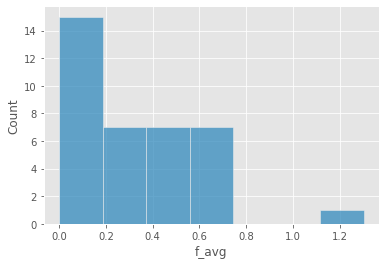

In [1982]:
sns.histplot(df['f_avg'])

<AxesSubplot:xlabel='m_avg', ylabel='Count'>

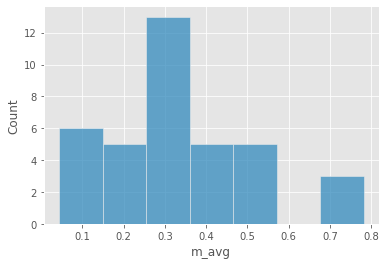

In [1983]:
sns.histplot(df['m_avg'])

<AxesSubplot:xlabel='k_avg', ylabel='Count'>

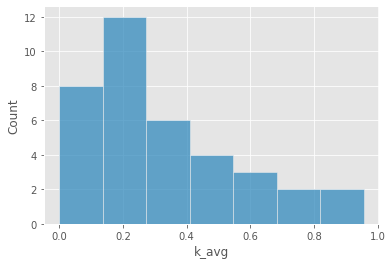

In [1984]:
sns.histplot(df['k_avg'])

In [1985]:
#describe the shape and distribution of the scores
#skewness and kurtosis
print("Skewness: %f" % df['f_avg'].skew())
print("Kurtosis: %f" % df['f_avg'].kurt())

Skewness: 1.256135
Kurtosis: 2.780699


In [1986]:
#describe the shape and distribution of the scores
#skewness and kurtosis
print("Skewness: %f" % df['m_avg'].skew())
print("Kurtosis: %f" % df['m_avg'].kurt())

Skewness: 0.788960
Kurtosis: 0.640920


In [1987]:
#describe the shape and distribution of the scores
#skewness and kurtosis
print("Skewness: %f" % df['k_avg'].skew())
print("Kurtosis: %f" % df['k_avg'].kurt())

Skewness: 1.094712
Kurtosis: 0.769328


Analysis of Characters for Max and Min F score

In [1988]:
print("The lowest fuckability score was", df['f_avg'].min())
print("The highest fuckability score was", df['f_avg'].max())

The lowest fuckability score was 0.0
The highest fuckability score was 1.3028169014084507


In [1989]:
#create filters
lowest = (df['f_avg'] == df['f_avg'].min())
highest = (df['f_avg'] == df['f_avg'].max())

In [1990]:
print("The Character with the lowest fuckability score is \n",df.loc[df['f_avg'] == df['f_avg'].min(), 'charName'])
print("The Character with the highest fuckability is \n", df.loc[df['f_avg'] == df['f_avg'].max(), 'charName'])

The Character with the lowest fuckability score is 
 0     Shikanoin Heizou 
25              Sucrose
27                Venti
Name: charName, dtype: object
The Character with the highest fuckability is 
 19    Mona
Name: charName, dtype: object


In [1991]:
df.sort_values(by=['f_avg'], ascending = False, inplace = True)
df[['f_avg', 'charName','Gender', 'Element','Weapon','Region']].head(5)

,f_avg,charName,Gender,Element,Weapon,Region
19,1.302817,Mona,Female,Hydro,Catalyst,Mondstadt
4,0.694836,Beidou,Female,Electro,Claymore,Liyue
28,0.694836,Yae Miko,Female,Electro,Catalyst,Inazuma
34,0.694836,Yelan,Female,Hydro,Bow,Liyue
21,0.694836,Raiden Shogun,Female,Electro,Polearm,Inazuma


In [1992]:
df.sort_values(by=['f_avg'], ascending = True, inplace = True)
df[['f_avg', 'charName','Gender', 'Element','Weapon','Region']].head(5)

,f_avg,charName,Gender,Element,Weapon,Region
0,0.000000,Shikanoin Heizou,Male,Anemo,Catalyst,Inazuma
25,0.000000,Sucrose,Female,Anemo,Catalyst,Mondstadt
27,0.000000,Venti,Male,Anemo,Bow,Mondstadt
2,0.043427,Amber,Female,Pyro,Bow,Mondstadt
33,0.043427,Xiao,Male,Anemo,Polearm,Liyue


In [1993]:

filt = (df['f_avg'] >= df['f_avg'].mean())
filt.value_counts()


False    20
True     17
Name: f_avg, dtype: int64

Analysis of Characters for Marriage Scores

In [1994]:
print("The lowest marriage score was", df['m_avg'].min())
print("The highest marriage score was", df['m_avg'].max())

The lowest marriage score was 0.04342723004694835
The highest marriage score was 0.7816901408450704


In [1995]:
print("The Character with the lowest marriagability score is \n",df.loc[df['m_avg'] == df['m_avg'].min(), 'charName'])
print("The Character with the marriagability score is \n", df.loc[df['m_avg'] == df['m_avg'].max(), 'charName'])

The Character with the lowest marriagability score is 
 0     Shikanoin Heizou 
33                 Xiao
Name: charName, dtype: object
The Character with the marriagability score is 
 26      Thoma
16     Keqing
30    Yoimiya
Name: charName, dtype: object


In [1996]:
df.sort_values(by=['m_avg'], ascending = False, inplace = True)
df[['m_avg', 'charName','Gender', 'Element','Weapon','Region']].head(5)

,m_avg,charName,Gender,Element,Weapon,Region
30,0.781690,Yoimiya,Female,Pyro,Bow,Inazuma
26,0.781690,Thoma,Male,Pyro,Polearm,Inazuma
16,0.781690,Keqing,Female,Electro,Sword,Liyue
35,0.521127,Kuki Shinobu,Female,Electro,Sword,Inazuma
31,0.521127,Yun Jin,Female,Geo,Polearm,Liyue


In [1997]:
df.sort_values(by=['m_avg'], ascending = True, inplace = True)
df[['m_avg', 'charName','Gender', 'Element','Weapon','Region']].head(5)

,m_avg,charName,Gender,Element,Weapon,Region
0,0.043427,Shikanoin Heizou,Male,Anemo,Catalyst,Inazuma
33,0.043427,Xiao,Male,Anemo,Polearm,Liyue
5,0.086854,Childe,Male,Hydro,Bow,Snezhnaya
17,0.086854,Kujou Sara,Female,Electro,Bow,Inazuma
21,0.130282,Raiden Shogun,Female,Electro,Polearm,Inazuma


In [1998]:
filt = (df['m_avg'] >= df['m_avg'].mean())
filt.value_counts()

False    20
True     17
Name: m_avg, dtype: int64

Analysis of Characters for Kill Scores

In [1999]:
print("The lowest marriage score was", df['k_avg'].min())
print("The highest marriage score was", df['k_avg'].max())

The lowest marriage score was 0.0
The highest marriage score was 0.9553990610328638


In [2000]:
print("The Character with the lowest killability score is \n",df.loc[df['k_avg'] == df['k_avg'].min(), 'charName'])
print("The Character with the killability score is \n", df.loc[df['k_avg'] == df['k_avg'].max(), 'charName'])

The Character with the lowest killability score is 
 0    Shikanoin Heizou 
Name: charName, dtype: object
The Character with the killability score is 
 33      Xiao
5     Childe
Name: charName, dtype: object


In [2001]:
df.sort_values(by=['k_avg'], ascending = False, inplace = True)
df[['k_avg', 'charName','Gender', 'Element','Weapon','Region']].head(5)

,k_avg,charName,Gender,Element,Weapon,Region
33,0.955399,Xiao,Male,Anemo,Polearm,Liyue
5,0.955399,Childe,Male,Hydro,Bow,Snezhnaya
32,0.738263,Zhongli,Male,Geo,Polearm,Liyue
12,0.694836,Kaedehara Kazuha,Male,Anemo,Sword,Inazuma
24,0.607981,Shenhe,Female,Cryo,Polearm,Liyue


In [2002]:
df.sort_values(by=['k_avg'], ascending = True, inplace = True)
df[['k_avg', 'charName','Gender', 'Element','Weapon','Region']].head(5)

,k_avg,charName,Gender,Element,Weapon,Region
0,0.000000,Shikanoin Heizou,Male,Anemo,Catalyst,Inazuma
3,0.043427,Arataki Itto,Male,Geo,Claymore,Inazuma
19,0.043427,Mona,Female,Hydro,Catalyst,Mondstadt
4,0.043427,Beidou,Female,Electro,Claymore,Liyue
34,0.086854,Yelan,Female,Hydro,Bow,Liyue


In [2003]:
filt = (df['k_avg'] >= df['k_avg'].mean())
filt.value_counts()

False    24
True     13
Name: k_avg, dtype: int64

Correlation

In [2004]:
df_scores = df.drop(columns=['f_val','m_val','k_val', 'charName', 'sum'])
df_scores.head()
df_scores_corr =  df_scores.copy(deep=False)

In [2005]:
non_int_columns = ["Gender", "Element", "Weapon", "Region"]
enc = LabelEncoder()

raw_list = []
legend = {}
for column in non_int_columns:
    legend[column] = df_scores_corr[column].unique()
    for item in df_scores_corr[column].unique():
        raw_list.append(item)
    enc.fit(df_scores_corr[column].unique())
    df_scores_corr[column] = enc.transform(df_scores_corr[column])

df_scores_corr.head()


,Gender,Element,Weapon,Region,f_avg,m_avg,k_avg
0,1,0,1,0,0.000000,0.043427,0.000000
3,1,3,2,0,0.347418,0.477700,0.043427
19,0,4,1,2,1.302817,0.347418,0.043427
4,0,2,2,1,0.694836,0.434272,0.043427
34,0,4,0,1,0.694836,0.303991,0.086854


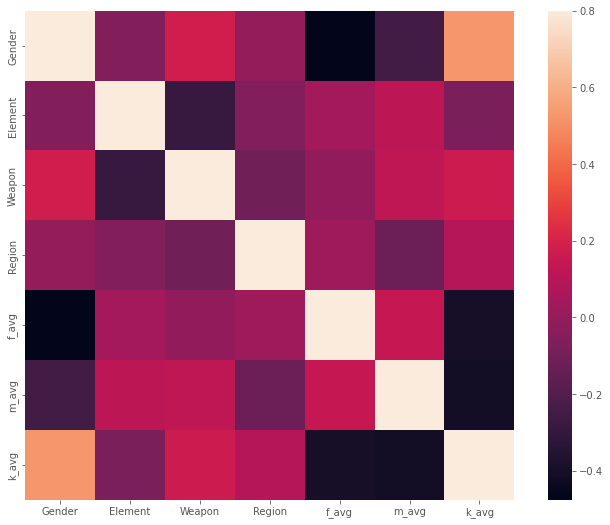

In [2006]:


#correlation matrix
corrmat = df_scores_corr.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);



In [2007]:
print(df_scores.head())

    Gender  Element    Weapon     Region     f_avg     m_avg     k_avg
0     Male    Anemo  Catalyst    Inazuma  0.000000  0.043427  0.000000
3     Male      Geo  Claymore    Inazuma  0.347418  0.477700  0.043427
19  Female    Hydro  Catalyst  Mondstadt  1.302817  0.347418  0.043427
4   Female  Electro  Claymore      Liyue  0.694836  0.434272  0.043427
34  Female    Hydro       Bow      Liyue  0.694836  0.303991  0.086854


How does Gender rank in each category?

In [2008]:
df_scores.groupby('Gender').f_avg.agg(['mean', 'median', 'max', 'min'])

,mean,median,max,min
Gender,,,,
Female,0.439701,0.412559,1.302817,0.0
Male,0.173709,0.130282,0.521127,0.0


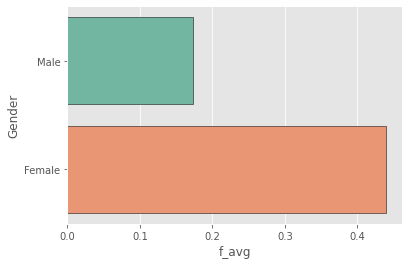

In [2009]:
#plot percent tested against borough using seaborn
sns.barplot(x="f_avg", y="Gender", 
            data=df_scores, orient = 'h', palette = "Set2", ci = None,
            edgecolor = "black", lw = '0.5', order=df_scores.groupby('Gender').f_avg.agg(['mean']).sort_values('mean').index
            )
plt.show()

In [2010]:
df_scores.groupby('Gender').m_avg.agg(['mean', 'median', 'max', 'min'])

,mean,median,max,min
Gender,,,,
Female,0.369131,0.347418,0.78169,0.086854
Male,0.270585,0.260563,0.78169,0.043427


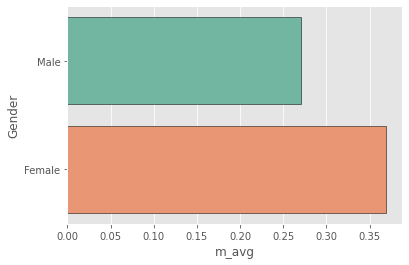

In [2011]:
#plot percent tested against borough using seaborn
sns.barplot(x="m_avg", y="Gender", 
            data=df_scores, orient = 'h', palette = "Set2", ci = None,
            edgecolor = "black", lw = '0.5', order=df_scores.groupby('Gender').m_avg.agg(['mean']).sort_values('mean').index
            )
plt.show()

In [2012]:
df_scores.groupby('Gender').k_avg.agg(['mean', 'median', 'max', 'min'])

,mean,median,max,min
Gender,,,,
Female,0.226183,0.217136,0.607981,0.043427
Male,0.491062,0.521127,0.955399,0.000000


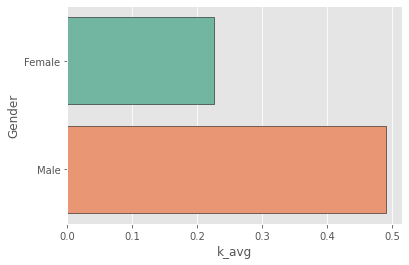

In [2013]:
#plot percent tested against borough using seaborn
sns.barplot(x="k_avg", y="Gender", 
            data=df_scores, orient = 'h', palette = "Set2", ci = None,
            edgecolor = "black", lw = '0.5', order=df_scores.groupby('Gender').k_avg.agg(['mean']).sort_values('mean').index
            )
plt.show()

In [2014]:
#Review
gender_f = list(df_scores.groupby('Gender').f_avg.agg(['mean']).sort_values('mean',ascending=False).index)
gender_m = list(df_scores.groupby('Gender').m_avg.agg(['mean']).sort_values('mean',ascending=False).index)
gender_k = list(df_scores.groupby('Gender').k_avg.agg(['mean']).sort_values('mean',ascending=False).index)

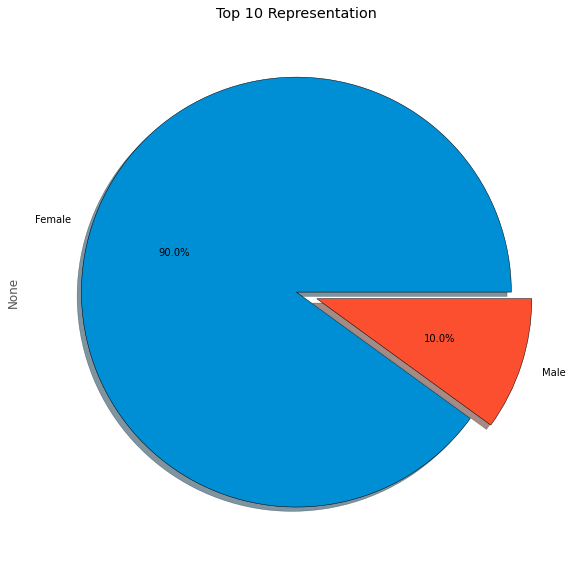

In [2015]:
top10 = df_scores.sort_values('f_avg',ascending=False).head(10).value_counts('Gender')
plt.style.use("ggplot")
fig = plt.gcf()
fig.set_size_inches(8,8)


explode = [0.1 if top10[element] == top10.min() else 0 for element in top10.index] 
colors = ['#008fd5', '#fc4f30', '#e5ae37', '#6d904f']

top10.plot.pie(y = top10.index, colors=colors, explode=explode, shadow=True,
       startangle=0, autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'})

plt.title("Top 10 Representation")
plt.tight_layout()
plt.show()

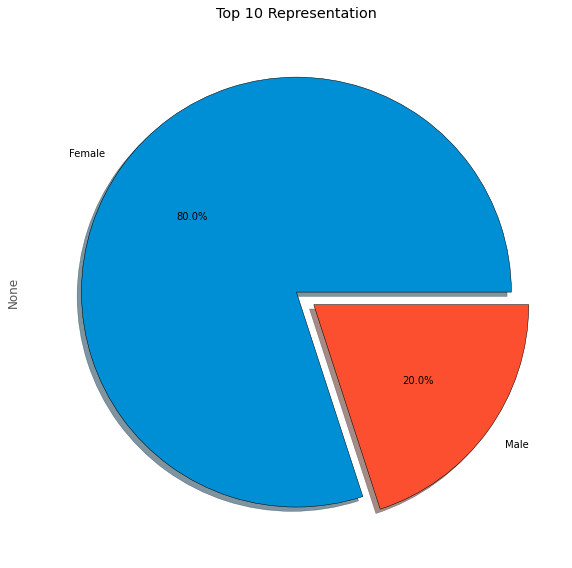

In [2016]:
top10 = df_scores.sort_values('m_avg',ascending=False).head(10).value_counts('Gender')
plt.style.use("ggplot")
fig = plt.gcf()
fig.set_size_inches(8,8)


explode = [0.1 if top10[element] == top10.min() else 0 for element in top10.index] 
colors = ['#008fd5', '#fc4f30', '#e5ae37', '#6d904f']

top10.plot.pie(y = top10.index, colors=colors, explode=explode, shadow=True,
       startangle=0, autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'})

plt.title("Top 10 Representation")
plt.tight_layout()
plt.show()

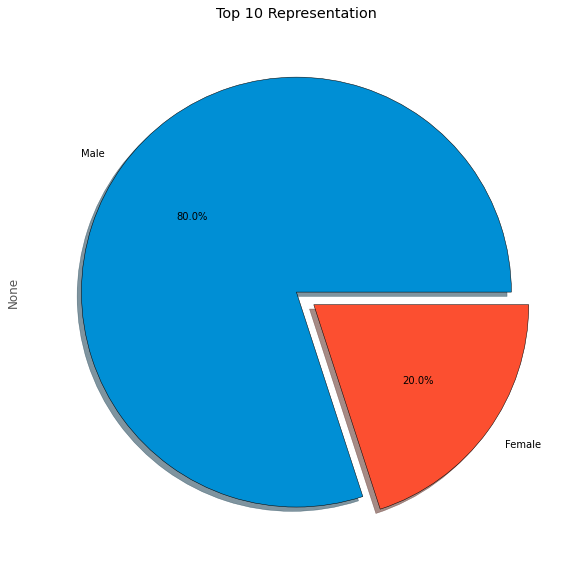

In [2017]:
top10 = df_scores.sort_values('k_avg',ascending=False).head(10).value_counts('Gender')
plt.style.use("ggplot")
fig = plt.gcf()
fig.set_size_inches(8,8)


explode = [0.1 if top10[element] == top10.min() else 0 for element in top10.index] 
colors = ['#008fd5', '#fc4f30', '#e5ae37', '#6d904f']

top10.plot.pie(y = top10.index, colors=colors, explode=explode, shadow=True,
       startangle=0, autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'})

plt.title("Top 10 Representation")
plt.tight_layout()
plt.show()

Which Elements ranked highest in each category?

In [2018]:
df_scores.groupby('Element').f_avg.agg(['mean', 'median', 'max', 'min'])


,mean,median,max,min
Element,,,,
Anemo,0.123044,0.021714,0.521127,0.000000
Cryo,0.412559,0.390845,0.607981,0.260563
Electro,0.570758,0.564554,0.694836,0.347418
Geo,0.238850,0.173709,0.477700,0.130282
Hydro,0.547183,0.303991,1.302817,0.173709
Pyro,0.204728,0.130282,0.521127,0.043427


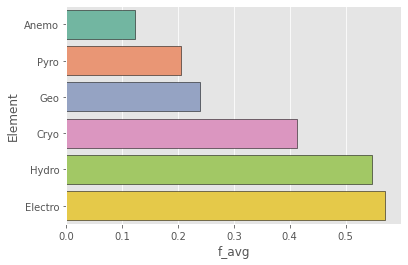

In [2019]:
#plot percent tested against borough using seaborn
sns.barplot(x="f_avg", y="Element", 
            data=df_scores, orient = 'h', palette = "Set2", ci = None,
            edgecolor = "black", lw = '0.5', order=df_scores.groupby('Element').f_avg.agg(['mean']).sort_values('mean').index
            )
plt.show()

In [2020]:
df_scores.groupby('Element').m_avg.agg(['mean', 'median', 'max', 'min'])

,mean,median,max,min
Element,,,,
Anemo,0.260563,0.303991,0.521127,0.043427
Cryo,0.347418,0.347418,0.521127,0.173709
Electro,0.378437,0.390845,0.781690,0.086854
Geo,0.332942,0.303991,0.521127,0.173709
Hydro,0.251878,0.303991,0.347418,0.086854
Pyro,0.403253,0.303991,0.781690,0.130282


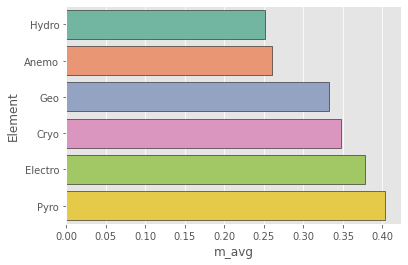

In [2021]:
#plot percent tested against borough using seaborn
sns.barplot(x="m_avg", y="Element", 
            data=df_scores.sort_values('m_avg'), orient = 'h', palette = "Set2", ci = None,
            edgecolor = "black", lw = '0.5', order=df_scores.groupby('Element').m_avg.agg(['mean']).sort_values('mean').index
            )
plt.show()

In [2022]:
df_scores.groupby('Element').k_avg.agg(['mean', 'median', 'max', 'min'])

,mean,median,max,min
Element,,,,
Anemo,0.434272,0.390845,0.955399,0.000000
Cryo,0.282277,0.195423,0.607981,0.086854
Electro,0.210932,0.217136,0.347418,0.043427
Geo,0.369131,0.347418,0.738263,0.043427
Hydro,0.390845,0.303991,0.955399,0.043427
Pyro,0.266767,0.260563,0.434272,0.086854


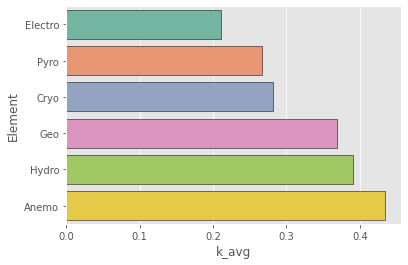

In [2023]:
#plot percent tested against borough using seaborn
sns.barplot(x="k_avg", y="Element", 
            data=df_scores.sort_values('m_avg'), orient = 'h', palette = "Set2", ci = None,
            edgecolor = "black", lw = '0.5', order=df_scores.groupby('Element').k_avg.agg(['mean']).sort_values('mean').index
            )
plt.show()

In [2024]:
#Review
element_f = list(df_scores.groupby('Element').f_avg.agg(['mean']).sort_values('mean',ascending=False).index)
element_m = list(df_scores.groupby('Element').m_avg.agg(['mean']).sort_values('mean',ascending=False).index)
element_k = list(df_scores.groupby('Element').k_avg.agg(['mean']).sort_values('mean',ascending=False).index)

In [2025]:
print("Most Fuckable:")
for index, element in enumerate(element_f):
    print(" ", str(index+1) + ".", element)

Most Fuckable:
  1. Electro
  2. Hydro
  3. Cryo
  4. Geo
  5. Pyro
  6. Anemo


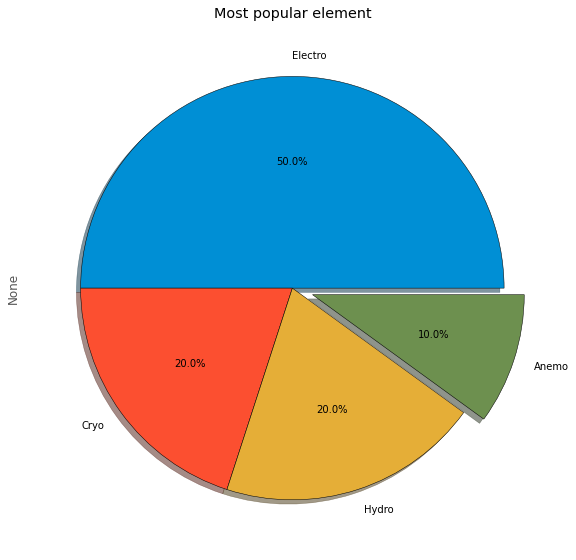

In [2026]:
top10 = df_scores.sort_values('f_avg',ascending=False).head(10)
elements = top10.value_counts('Element')
plt.style.use("ggplot")
fig = plt.gcf()
fig.set_size_inches(8,8)


explode = [0.1 if elements[element] == elements.min() else 0 for element in elements.index] 
colors = ['#008fd5', '#fc4f30', '#e5ae37', '#6d904f']

elements.plot.pie(y = elements.index, colors=colors, explode=explode, shadow=True,
       startangle=0, autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'})

plt.title("Most popular element")
plt.tight_layout()
plt.show()

In [2027]:
print("Most Marriagable:")
for index, element in enumerate(element_m):
    print(" ", str(index+1) + ".", element)

Most Marriagable:
  1. Pyro
  2. Electro
  3. Cryo
  4. Geo
  5. Anemo
  6. Hydro


In [2028]:
top10 = df_scores.sort_values('m_avg',ascending=False).head(10)
elements = top10.value_counts('Element')

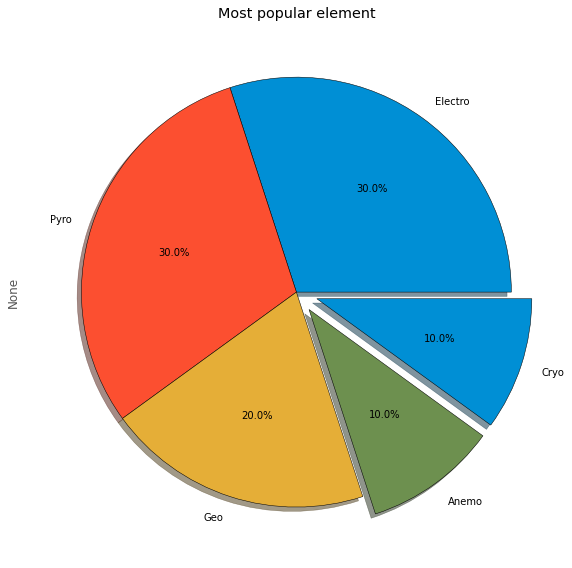

In [2029]:
plt.style.use("ggplot")
fig = plt.gcf()
fig.set_size_inches(8,8)


explode = [0.1 if elements[element] == elements.min() else 0 for element in elements.index] 
colors = ['#008fd5', '#fc4f30', '#e5ae37', '#6d904f']

elements.plot.pie(y = elements.index, colors=colors, explode=explode, shadow=True,
       startangle=0, autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'})

plt.title("Most popular element")
plt.tight_layout()
plt.show()

In [2030]:
print("Most Killable:")
for index, element in enumerate(element_k):
    print(" ", str(index+1) + ".", element)

Most Killable:
  1. Anemo
  2. Hydro
  3. Geo
  4. Cryo
  5. Pyro
  6. Electro


In [2031]:
top10 = df_scores.sort_values('k_avg',ascending=False).head(10)
elements = top10.value_counts('Element')

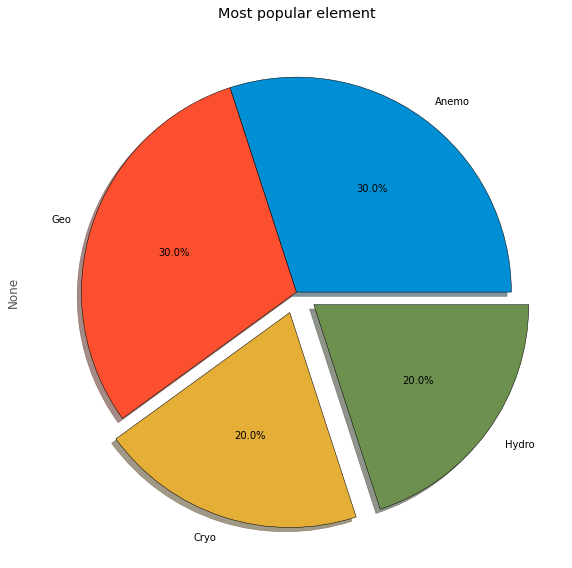

In [2032]:
plt.style.use("ggplot")
fig = plt.gcf()
fig.set_size_inches(8,8)


explode = [0.1 if elements[element] == elements.min() else 0 for element in elements.index] 
colors = ['#008fd5', '#fc4f30', '#e5ae37', '#6d904f']

elements.plot.pie(y = elements.index, colors=colors, explode=explode, shadow=True,
       startangle=0, autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'})

plt.title("Most popular element")
plt.tight_layout()
plt.show()

In [2033]:
for element in df_scores['Element'].unique():
    print(element) 
    print("  Fuckability:" + str(element_f.index(element)+1))
    print("  Marriagiability:" + str(element_m.index(element)+1)) 
    print("  Killability:" + str(element_k.index(element)+1))

Anemo
  Fuckability:6
  Marriagiability:5
  Killability:1
Geo
  Fuckability:4
  Marriagiability:4
  Killability:3
Hydro
  Fuckability:2
  Marriagiability:6
  Killability:2
Electro
  Fuckability:1
  Marriagiability:2
  Killability:6
Cryo
  Fuckability:3
  Marriagiability:3
  Killability:4
Pyro
  Fuckability:5
  Marriagiability:1
  Killability:5


What Weapons ranked highest in each category?

In [2034]:
df_scores.groupby('Weapon').f_avg.agg(['mean', 'median', 'max', 'min'])

,mean,median,max,min
Weapon,,,,
Bow,0.298562,0.303991,0.694836,0.000000
Catalyst,0.419797,0.303991,1.302817,0.000000
Claymore,0.338732,0.347418,0.694836,0.130282
Polearm,0.310195,0.173709,0.694836,0.043427
Sword,0.347418,0.347418,0.564554,0.130282


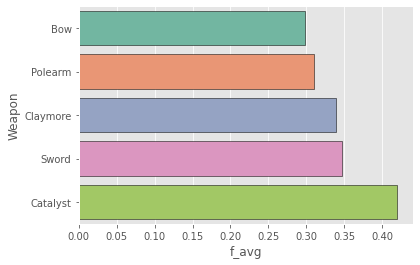

In [2035]:
#plot percent tested against borough using seaborn
sns.barplot(x="f_avg", y="Weapon", 
            data=df_scores, orient = 'h', palette = "Set2", ci = None,
            edgecolor = "black", lw = '0.5', order=df_scores.groupby('Weapon').f_avg.agg(['mean']).sort_values('mean').index
            )
plt.show()

In [2036]:
df_scores.groupby('Weapon').m_avg.agg(['mean', 'median', 'max', 'min'])

,mean,median,max,min
Weapon,,,,
Bow,0.320276,0.303991,0.781690,0.086854
Catalyst,0.303991,0.347418,0.521127,0.043427
Claymore,0.338732,0.390845,0.477700,0.130282
Polearm,0.328806,0.303991,0.781690,0.043427
Sword,0.385417,0.325704,0.781690,0.173709


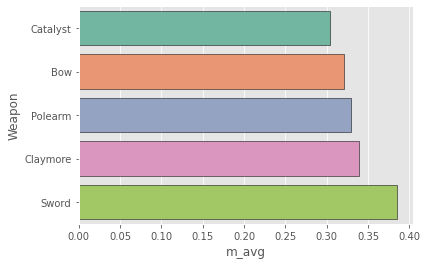

In [2037]:
#plot percent tested against borough using seaborn
sns.barplot(x="m_avg", y="Weapon", 
            data=df_scores, orient = 'h', palette = "Set2", ci = None,
            edgecolor = "black", lw = '0.5', order=df_scores.groupby('Weapon').m_avg.agg(['mean']).sort_values('mean').index
            )
plt.show()

In [2038]:
df_scores.groupby('Weapon').k_avg.agg(['mean', 'median', 'max', 'min'])

,mean,median,max,min
Weapon,,,,
Bow,0.369131,0.282277,0.955399,0.086854
Catalyst,0.202660,0.217136,0.434272,0.000000
Claymore,0.147653,0.086854,0.390845,0.043427
Polearm,0.477700,0.303991,0.955399,0.217136
Sword,0.369131,0.369131,0.694836,0.086854


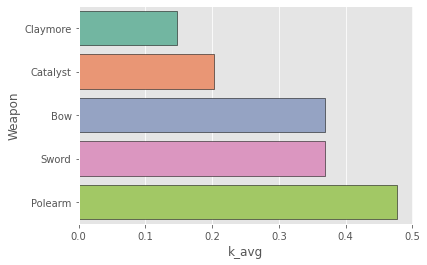

In [2039]:
#plot percent tested against borough using seaborn
sns.barplot(x="k_avg", y="Weapon", 
            data=df_scores, orient = 'h', palette = "Set2", ci = None,
            edgecolor = "black", lw = '0.5', order=df_scores.groupby('Weapon').k_avg.agg(['mean']).sort_values('mean').index
            )
plt.show()

In [2040]:
#Review
weapon_f = list(df_scores.groupby('Weapon').f_avg.agg(['mean']).sort_values('mean',ascending=False).index)
weapon_m = list(df_scores.groupby('Weapon').m_avg.agg(['mean']).sort_values('mean',ascending=False).index)
weapon_k = list(df_scores.groupby('Weapon').k_avg.agg(['mean']).sort_values('mean',ascending=False).index)

In [2041]:

print("Most Fuckable:")
for index, element in enumerate(weapon_f):
    print(" ", str(index+1) + ".", element)

Most Fuckable:
  1. Catalyst
  2. Sword
  3. Claymore
  4. Polearm
  5. Bow


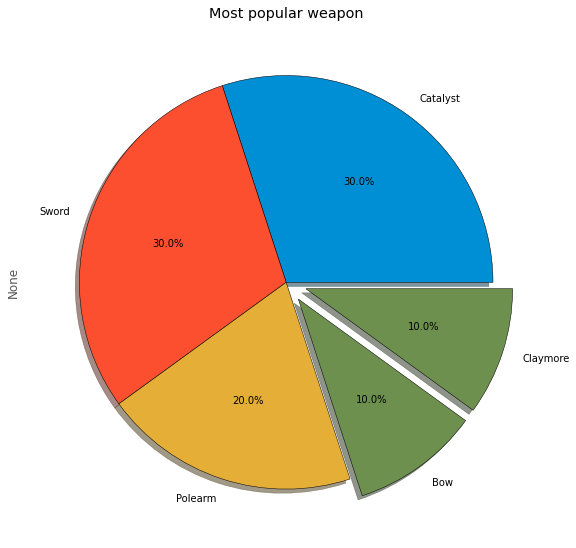

In [2042]:
top10 = df_scores.sort_values('f_avg',ascending=False).head(10).value_counts('Weapon')
plt.style.use("ggplot")
fig = plt.gcf()
fig.set_size_inches(8,8)


explode = [0.1 if top10[weapon] == top10.min() else 0 for weapon in top10.index] 
colors = ['#008fd5', '#fc4f30', '#e5ae37', '#6d904f', '#6d904f']


top10.plot.pie(y = top10.index, colors=colors, explode=explode, shadow=True,
       startangle=0, autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'})

plt.title("Most popular weapon")
plt.tight_layout()
plt.show()


In [2043]:
print("Most Marriagable:")
for index, weapon in enumerate(weapon_m):
    print(" ", str(index+1) + ".", weapon)

Most Marriagable:
  1. Sword
  2. Claymore
  3. Polearm
  4. Bow
  5. Catalyst


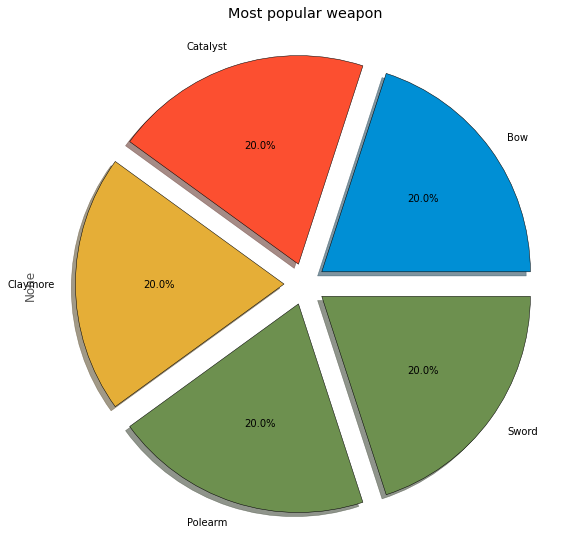

In [2044]:
top10 = df_scores.sort_values('m_avg',ascending=False).head(10).value_counts('Weapon')

plt.style.use("ggplot")
fig = plt.gcf()
fig.set_size_inches(8,8)


explode = [0.1 if top10[weapon] == top10.min() else 0 for weapon in top10.index] 
colors = ['#008fd5', '#fc4f30', '#e5ae37', '#6d904f', '#6d904f']


top10.plot.pie(y = top10.index, colors=colors, explode=explode, shadow=True,
       startangle=0, autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'})

plt.title("Most popular weapon")
plt.tight_layout()
plt.show()


In [2045]:
print("Most Killable:")
for index, weapon in enumerate(weapon_k):
    print(" ", str(index+1) + ".", weapon)

Most Killable:
  1. Polearm
  2. Bow
  3. Sword
  4. Catalyst
  5. Claymore


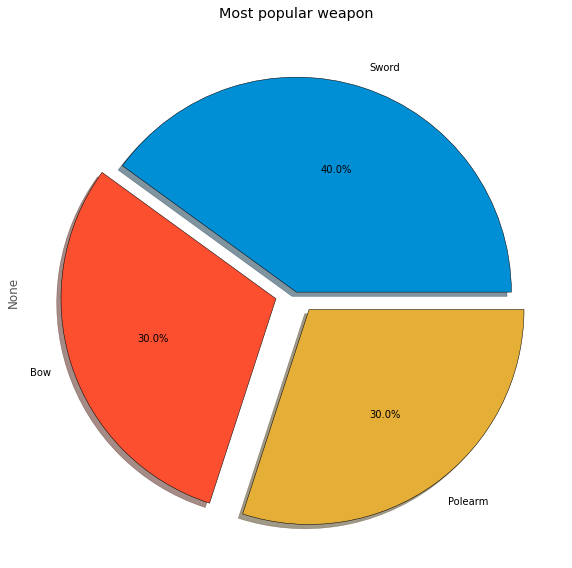

In [2046]:
top10 = df_scores.sort_values('k_avg',ascending=False).head(10).value_counts('Weapon')

plt.style.use("ggplot")
fig = plt.gcf()
fig.set_size_inches(8,8)


explode = [0.1 if top10[weapon] == top10.min() else 0 for weapon in top10.index] 
colors = ['#008fd5', '#fc4f30', '#e5ae37', '#6d904f', '#6d904f']


top10.plot.pie(y = top10.index, colors=colors, explode=explode, shadow=True,
       startangle=0, autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'})

plt.title("Most popular weapon")
plt.tight_layout()
plt.show()


In [2047]:
for element in df_scores['Weapon'].unique():
    print(element) 
    print("  Fuckability:" + str(weapon_f.index(element)+1))
    print("  Marriagiability:" + str(weapon_m.index(element)+1)) 
    print("  Killability:" + str(weapon_k.index(element)+1))

Catalyst
  Fuckability:1
  Marriagiability:5
  Killability:4
Claymore
  Fuckability:3
  Marriagiability:2
  Killability:5
Bow
  Fuckability:5
  Marriagiability:4
  Killability:2
Sword
  Fuckability:2
  Marriagiability:1
  Killability:3
Polearm
  Fuckability:4
  Marriagiability:3
  Killability:1


How do Regions rank?

In [2048]:
df_scores.groupby('Region').f_avg.agg(['mean', 'median', 'max', 'min'])

,mean,median,max,min
Region,,,,
Inazuma,0.334056,0.260563,0.694836,0.000000
Liyue,0.347418,0.303991,0.694836,0.043427
Mondstadt,0.363210,0.390845,1.302817,0.000000
Snezhnaya,0.303991,0.303991,0.303991,0.303991


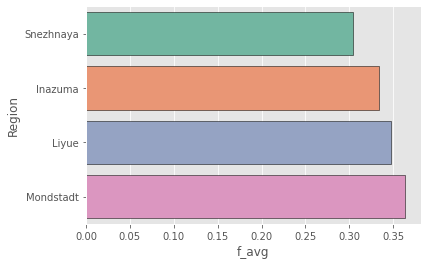

In [2049]:
#plot percent tested against borough using seaborn
sns.barplot(x="f_avg", y="Region", 
            data=df_scores, orient = 'h', palette = "Set2", ci = None,
            edgecolor = "black", lw = '0.5', order=df_scores.groupby('Region').f_avg.agg(['mean']).sort_values('mean').index
            )
plt.show()

In [2050]:
df_scores.groupby('Region').m_avg.agg(['mean', 'median', 'max', 'min'])

,mean,median,max,min
Region,,,,
Inazuma,0.347418,0.303991,0.781690,0.043427
Liyue,0.347418,0.325704,0.781690,0.043427
Mondstadt,0.327678,0.303991,0.521127,0.130282
Snezhnaya,0.086854,0.086854,0.086854,0.086854


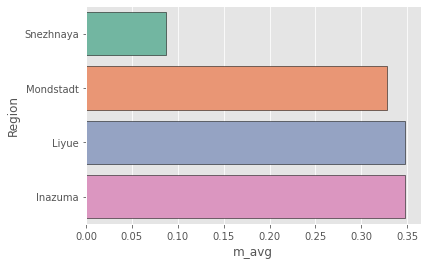

In [2051]:
#plot percent tested against borough using seaborn
sns.barplot(x="m_avg", y="Region", 
            data=df_scores, orient = 'h', palette = "Set2", ci = None,
            edgecolor = "black", lw = '0.5', order=df_scores.groupby('Region').m_avg.agg(['mean']).sort_values('mean').index
            )
plt.show()

In [2052]:
df_scores.groupby('Region').k_avg.agg(['mean', 'median', 'max', 'min'])

,mean,median,max,min
Region,,,,
Inazuma,0.300650,0.303991,0.694836,0.000000
Liyue,0.351037,0.238850,0.955399,0.043427
Mondstadt,0.248720,0.217136,0.564554,0.043427
Snezhnaya,0.955399,0.955399,0.955399,0.955399


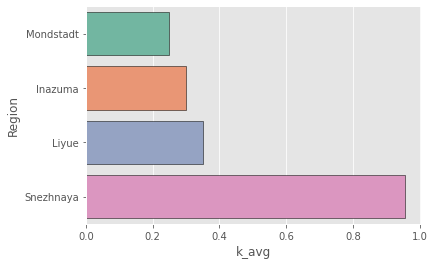

In [2053]:
#plot percent tested against borough using seaborn
sns.barplot(x="k_avg", y="Region", 
            data=df_scores, orient = 'h', palette = "Set2", ci = None,
            edgecolor = "black", lw = '0.5', order=df_scores.groupby('Region').k_avg.agg(['mean']).sort_values('mean').index
            )
plt.show()

In [2054]:
#Review
region_f = list(df_scores.groupby('Region').f_avg.agg(['mean']).sort_values('mean',ascending=False).index)
region_m = list(df_scores.groupby('Region').m_avg.agg(['mean']).sort_values('mean',ascending=False).index)
region_k = list(df_scores.groupby('Region').k_avg.agg(['mean']).sort_values('mean',ascending=False).index)

In [2055]:

print("Most Fuckable:")
for index, element in enumerate(region_f):
    print(" ", str(index+1) + ".", element)

Most Fuckable:
  1. Mondstadt
  2. Liyue
  3. Inazuma
  4. Snezhnaya


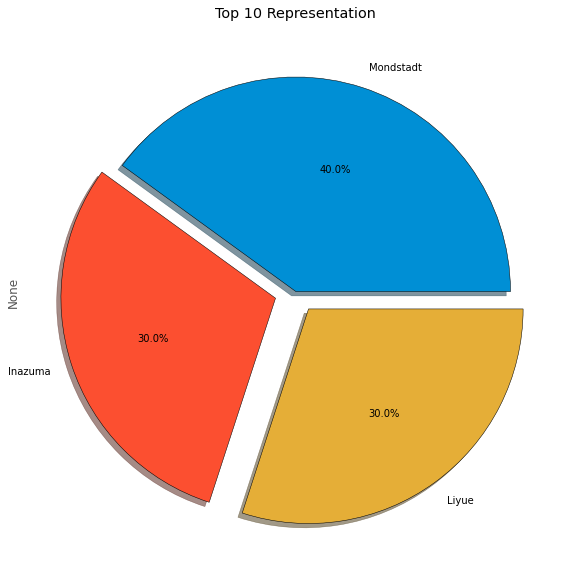

In [2056]:
top10 = df_scores.sort_values('f_avg',ascending=False).head(10).value_counts('Region')
plt.style.use("ggplot")
fig = plt.gcf()
fig.set_size_inches(8,8)


explode = [0.1 if top10[element] == top10.min() else 0 for element in top10.index] 
colors = ['#008fd5', '#fc4f30', '#e5ae37', '#6d904f']

top10.plot.pie(y = top10.index, colors=colors, explode=explode, shadow=True,
       startangle=0, autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'})

plt.title("Top 10 Representation")
plt.tight_layout()
plt.show()

In [2057]:

print("Most Marriagiabe:")
for index, element in enumerate(region_m):
    print(" ", str(index+1) + ".", element)

Most Marriagiabe:
  1. Inazuma
  2. Liyue
  3. Mondstadt
  4. Snezhnaya


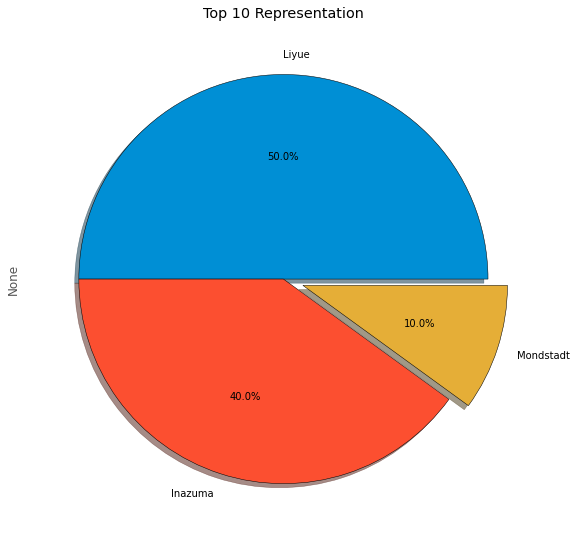

In [2058]:
top10 = df_scores.sort_values('m_avg',ascending=False).head(10).value_counts('Region')
plt.style.use("ggplot")
fig = plt.gcf()
fig.set_size_inches(8,8)


explode = [0.1 if top10[element] == top10.min() else 0 for element in top10.index] 
colors = ['#008fd5', '#fc4f30', '#e5ae37', '#6d904f']

top10.plot.pie(y = top10.index, colors=colors, explode=explode, shadow=True,
       startangle=0, autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'})

plt.title("Top 10 Representation")
plt.tight_layout()
plt.show()

In [2059]:

print("Most Killable:")
for index, element in enumerate(region_k):
    print(" ", str(index+1) + ".", element)

Most Killable:
  1. Snezhnaya
  2. Liyue
  3. Inazuma
  4. Mondstadt


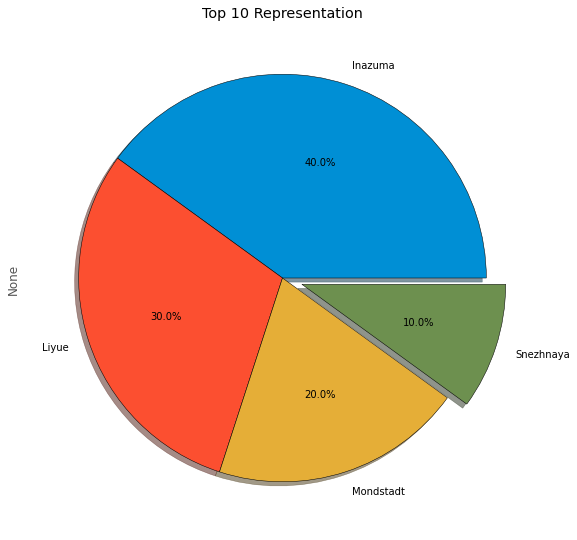

In [2060]:
top10 = df_scores.sort_values('k_avg',ascending=False).head(10).value_counts('Region')
plt.style.use("ggplot")
fig = plt.gcf()
fig.set_size_inches(8,8)


explode = [0.1 if top10[element] == top10.min() else 0 for element in top10.index] 
colors = ['#008fd5', '#fc4f30', '#e5ae37', '#6d904f']

top10.plot.pie(y = top10.index, colors=colors, explode=explode, shadow=True,
       startangle=0, autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'})

plt.title("Top 10 Representation")
plt.tight_layout()
plt.show()

Review of All Individual Categories

In [2066]:
print("Fuckability:")
for i in range(max(len(df_scores["Region"].unique()),len(df_scores["Weapon"].unique()),len(df_scores["Gender"].unique()), len(df_scores["Weapon"].unique()))):
    print("Top " + str(i) + ": ", "    " if i >= len(gender_f) else gender_f[i], "" if i >= len(element_f) else  element_f[i], "" if i >=  len(weapon_f) else  weapon_f[i], "" if i >= len(region_f) else  region_f[i],)



Fuckability:
Top 0:  Female Electro Catalyst Mondstadt
Top 1:  Male Hydro Sword Liyue
Top 2:       Cryo Claymore Inazuma
Top 3:       Geo Polearm Snezhnaya
Top 4:       Pyro Bow 


In [2069]:
print("Marriagiblility:")
for i in range(max(len(df_scores["Region"].unique()),len(df_scores["Weapon"].unique()),len(df_scores["Gender"].unique()), len(df_scores["Weapon"].unique()))):
    print("Top " + str(i+1) + ": ", "    " if i >= len(gender_m) else gender_m[i], "" if i >= len(element_m) else  element_m[i], "" if i >=  len(weapon_m) else  weapon_m[i], "" if i >= len(region_m) else  region_m[i],)



Marriagiblility:
Top 1:  Female Pyro Sword Inazuma
Top 2:  Male Electro Claymore Liyue
Top 3:       Cryo Polearm Mondstadt
Top 4:       Geo Bow Snezhnaya
Top 5:       Anemo Catalyst 


In [2071]:
print("Killability:")
for i in range(max(len(df_scores["Region"].unique()),len(df_scores["Weapon"].unique()),len(df_scores["Gender"].unique()), len(df_scores["Weapon"].unique()))):
    print("Top " + str(i+1) + ": ", "    " if i >= len(gender_k) else gender_k[i], "" if i >= len(element_k) else  element_k[i], "" if i >=  len(weapon_k) else  weapon_k[i], "" if i >= len(region_k) else  region_k[i],)


Killability:
Top 1:  Male Anemo Polearm Snezhnaya
Top 2:  Female Hydro Bow Liyue
Top 3:       Geo Sword Inazuma
Top 4:       Cryo Catalyst Mondstadt
Top 5:       Pyro Claymore 
